In [1]:
#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

#imports for user defined functions
from env import host, user, password, get_db_url

# Imports for arithmetic calculations and data frame manipulation
import math
import numpy as np
import pandas as pd

#Imports for statistical analysis
from scipy import stats
import statistics

#imports for splitting data and imputing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

#Imports for creating visualizations
import matplotlib.pyplot as plt 
import seaborn as sns

#Imports for user defined functions
import wrangle as wr
import explore as ex

## Acquire Data

In [2]:
train, validate, test = wr.wrangle_zillow_mvp()
train.shape, validate.shape, test.shape

Using cached csv...


((25550, 6), (10950, 6), (9126, 6))

In [3]:
train.head()

,bedrooms,bathrooms,year_built,square_feet,county,assessed_value
17219,4,2.0,1979.0,1909,Ventura,296809
36164,3,3.0,1999.0,3159,Ventura,938664
16548,4,3.0,1956.0,2825,Ventura,766513
29763,3,2.0,1947.0,1350,Los Angeles,464414
22852,2,1.0,1947.0,740,Orange,117601


## Initial Questions to Answer:

1. Is there a linear relationship between a home's number of bedrooms and it's assessed value?
2. Do certain counties have a higher average assessed value than others? Related question, do properties with roughly the same attributes be valued much differently solely based on location?
3. Does the year a home was built (how old it is) affect it's assessed value? 
4. Is having only 1 bathroom worse for the value of a home than having only two bedrooms?

## Initial Exploration with Visualizations

Text(0, 0.5, 'Correlation')

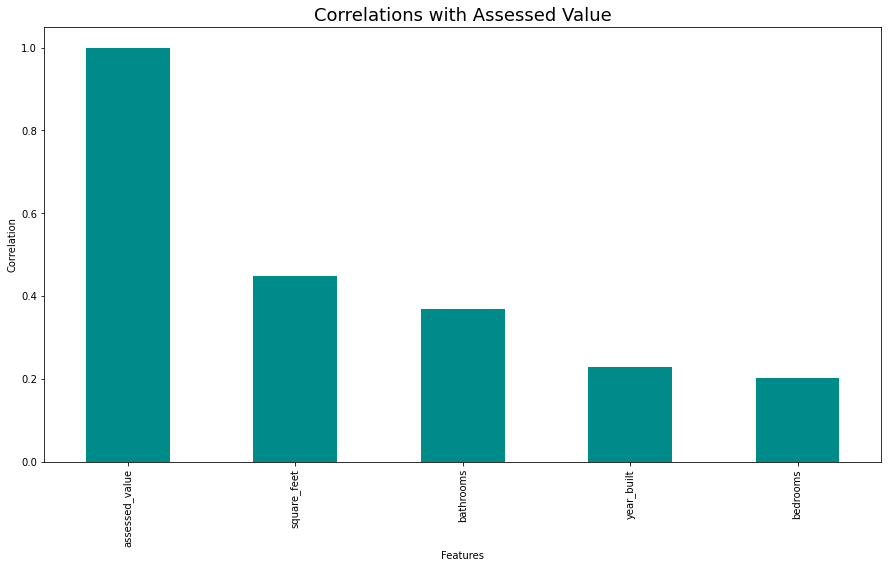

In [4]:
# Checking assessed_value correlation vs all variables

quant_vars = ['bedrooms', 'bathrooms', 'square_feet']
cat_vars = ['year_built', 'county']
target = ['assessed_value']

plt.figure(figsize= (15, 8))
train.corr()['assessed_value'].sort_values(ascending=False).plot(kind='bar', color = 'darkcyan')
plt.title('Correlations with Assessed Value', fontsize = 18)
plt.xlabel('Features')
plt.ylabel('Correlation')

<AxesSubplot:>

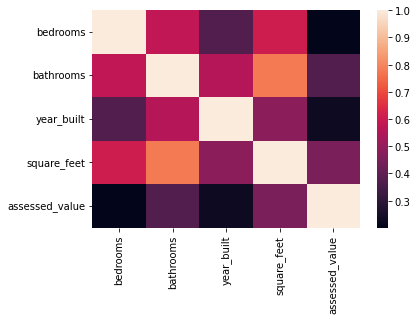

In [5]:
sns.heatmap(train.corr())

Takeaways: 
- This visualization gives me a good starting point for which variables are most highly correlated with my target: 
    - square_feet and number of bathrooms are my top two variables in terms of correlation

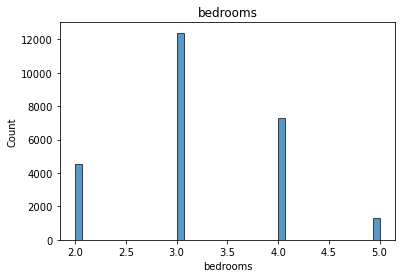

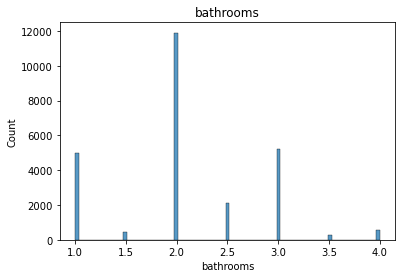

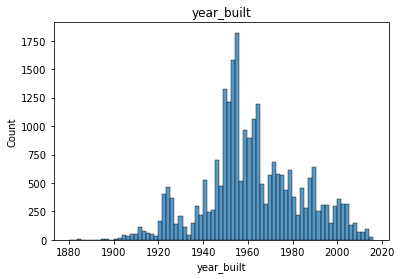

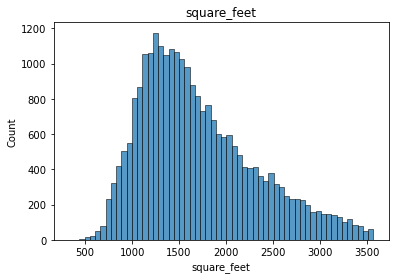

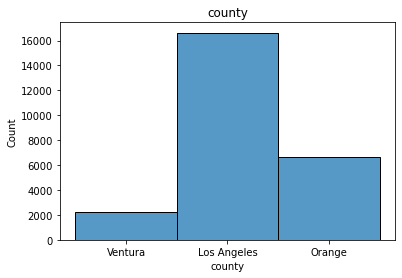

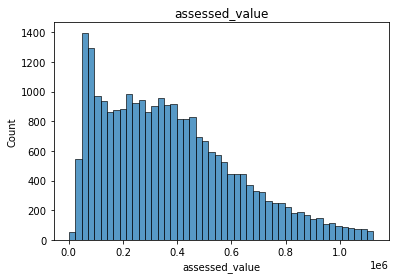

In [6]:
# Univariate exploration -- Plot Distributions
ex.plot_distributions(train)

Takeaways:
- Most homes are two bedroom homes followed by four. 
- Most homes have two bathrooms.
- Most homes were built between the 50s and early 60s.
- Most homes are around 1300 - 1500 square ft.
- Vast majority of homes are in LA county.
- Home values skews left.

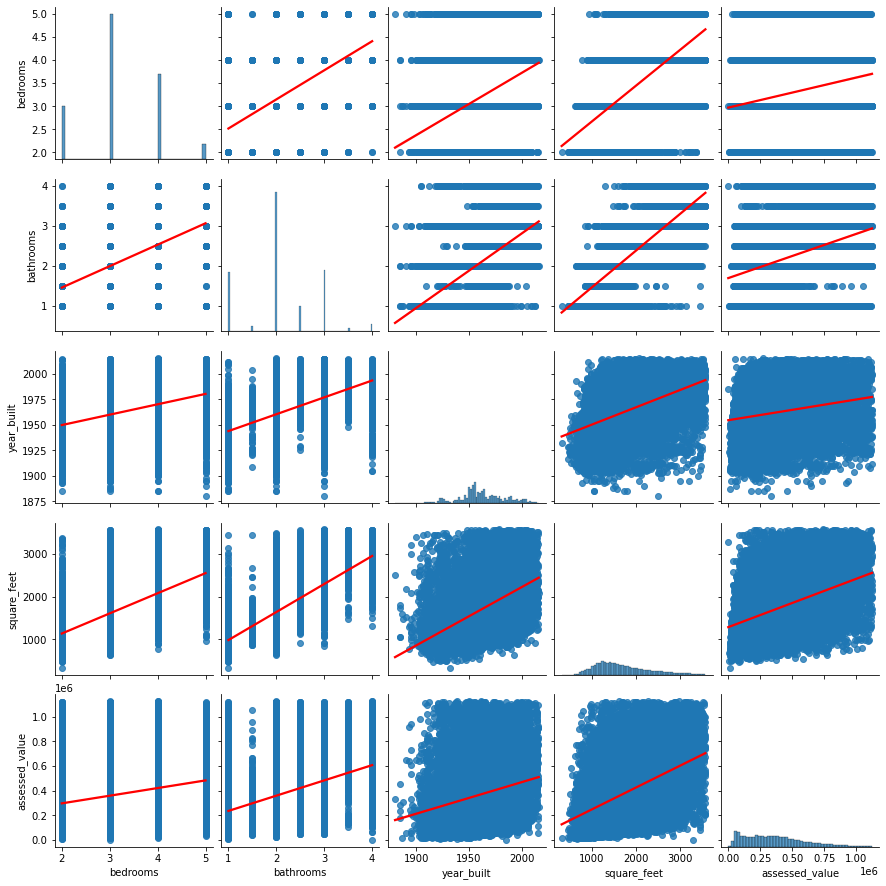

In [7]:
# Plot variable pairs
ex.plot_variable_pairs(train)

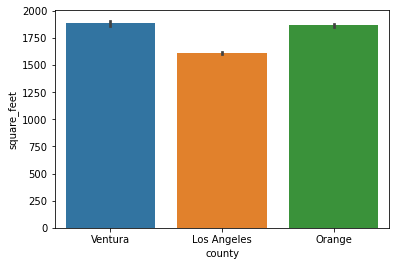

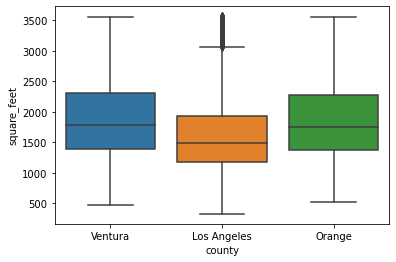

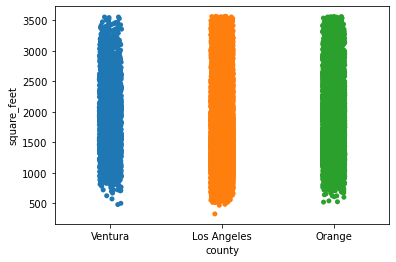

In [8]:
# Plot square feet by county
ex.plot_categorical_and_continuous_vars(train, 'county', 'square_feet')

Takeaways:
- There isn't a huge difference between square feet and county but homes in LA county are somewhat smaller on average than Ventura and Orange.

## Statistical Tests
*Confidence level will be 95%*

In [9]:
# Create a function that will conduct my pearson r test and tell me if it the relationship is statistically significant
def pearsonr(variable, target, alpha =.05):
    corr, p = stats.pearsonr(variable, target)
    print(f'The correlation value between the two variables is {corr:.4} and the P-Value is {p}.')
    print('----------------------------------------------------------------------------')
    if p < alpha:
        print('Since the P value is less than the alpha, we reject the null hypothesis.')
    else:
        print('Since the P value is greater than the alpha, we fail to reject the null hypothesis.')
    
target = train.assessed_value

### Question 1: Is there a linear relationship between a home's number of bedrooms and it's assessed value?

$H0$: The number of bedrooms is not linearly correlated with assessed home value.

$Ha$: The number of bedrooms is linearly correlated with assessed home value.

In [10]:
pearsonr(train.bedrooms, target)

The correlation value between the two variables is 0.2009 and the P-Value is 7.288335563165177e-231.
----------------------------------------------------------------------------
Since the P value is less than the alpha, we reject the null hypothesis.


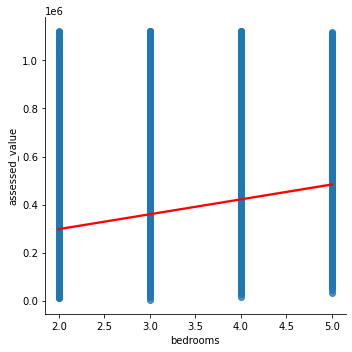

In [11]:
# Create a line plot with regression line to visualize relationship
sns.lmplot(x='bedrooms', y='assessed_value', data=train, line_kws={'color':'red'})
plt.show()

### 2. Do certain counties have a higher average assessed value than others? Related question, are properties with roughly the same attributes valued significantly differently solely based on location?

$H0$: County location is not correlated with assessed home value.

$Ha$: County location is correlated with assessed home value.

In [12]:
## Conduct chi 2 test since county is categorical variable

def chi2(variable, target, alpha=.05):
    observed = pd.crosstab(variable, target)
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    print(f'The chi2 value between the two variables is {chi2} and the P-Value is {p}.')
    print('----------------------------------------------------------------------------')
    if p < alpha:
        print('Since the P value is less than the alpha, we reject the null hypothesis.')
    else:
        print('Since the P value is greater than the alpha, we fail to reject the null hypothesis.')

In [13]:
chi2(train.county, target)

The chi2 value between the two variables is 44203.871071984984 and the P-Value is 8.311121914671608e-33.
----------------------------------------------------------------------------
Since the P value is less than the alpha, we reject the null hypothesis.


In [ ]:
sns.swarmplot(x='square_feet', y='assessed_value', data=train, hue='county')

### 3. Does the year a home was built (how old it is) affect it's assessed value?

$H0$: The year a home was built is not linearly correlated with assessed home value.

$Ha$: The year a home was built is linearly correlated with assessed home value.

In [15]:
chi2(train.year_built, target)

The chi2 value between the two variables is 2604356.357840654 and the P-Value is 2.3304011881788194e-16.
----------------------------------------------------------------------------
Since the P value is less than the alpha, we reject the null hypothesis.


### 4. Is having only 1 bathroom worse for the value of a home than having only two bedrooms?

$H0$: The number of bathrooms a home has is not linearly correlated with assessed home value.

$Ha$: The number of bathrooms a home has is linearly correlated with assessed home value.

In [16]:
pearsonr(train.bathrooms, target)

The correlation value between the two variables is 0.3697 and the P-Value is 0.0.
----------------------------------------------------------------------------
Since the P value is less than the alpha, we reject the null hypothesis.
